<a href="https://colab.research.google.com/github/AleOi2/PSI3472/blob/master/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#cnn1.py - testado em Colab com TF2
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras import optimizers
import numpy as np
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
batch_size = 5000
num_classes = 10
epochs = 5
nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()

ax = ax.reshape(ax.shape[0], nl, nc, 3)
qx = qx.reshape(qx.shape[0], nl, nc, 3)
input_shape = (nl, nc, 3)
ax = ax.astype('float32')
qx = qx.astype('float32')
ax /= 255 #0 a 1
qx /= 255 #0 a 1
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(40, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #20x16x16x3
model.add(Conv2D(80, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(80, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #40x8x8x3
model.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #80x4x4x3
model.add(Conv2D(320, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Conv2D(320, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x2x2x3
model.add(Conv2D(320, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Conv2D(320, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x1x1x3
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes,activation='softmax'))
from keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True)
model.summary()
filtersBefore = model.get_layer(index=0).get_weights()
print("Before")
print(filtersBefore)

opt=optimizers.Adam()
model.compile(optimizer=opt,
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(ax, ay,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(qx, qy))
print("After")
filtersAfter = model.get_layer(index=0).get_weights()
print(filtersAfter)

score = model.evaluate(qx, qy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('cnn1.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 40)        1120      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 40)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 40)        14440     
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 40)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 40)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 80)       

In [ ]:
print("Before")
print(filtersBefore)
def FilterPresentation(filter):
  mi = []
  desv =[] 
  gamma = []
  beta = []
  for color in range(0,3):
    desv.append(filter[0][color])
    mi.append(filter[1][color])
    beta.append(filter[2][color])
    gamma.append(filter[3][color])
  return (mi, desv, gamma, beta)
(miBefore, desvBefore, gammaBefore, betaBefore) = FilterPresentation(filtersBefore)
print("desv Before:")
print(desvBefore)

print("mi Before:")
print(miBefore)

print("beta Before:")
print(betaBefore)

print("gamma Before:")
print(gammaBefore)


print("After")
(miAfter, desvAfter, gammaAfter, betaAfter) = FilterPresentation(filtersAfter)
print("desv After:")
print(desvAfter)

print("mi After:")
print(miBefore)

print("beta After:")
print(betaAfter)

print("gamma After:")
print(gammaAfter)




Before
[array([1., 1., 1.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([1., 1., 1.], dtype=float32)]
desv Before:
[1.0, 1.0, 1.0]
mi Before:
[0.0, 0.0, 0.0]
beta Before:
[0.0, 0.0, 0.0]
gamma Before:
[1.0, 1.0, 1.0]
After
desv After:
[0.9955813, 1.0013471, 1.0025114]
mi After:
[0.0, 0.0, 0.0]
beta After:
[0.08948206, 0.08780106, 0.08131497]
gamma After:
[0.8290194, 0.82870257, 0.83036834]


# Exercício 2

Real-time data augmentation.


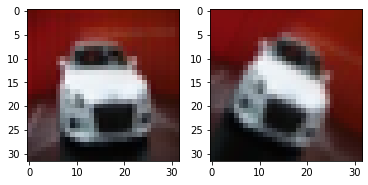

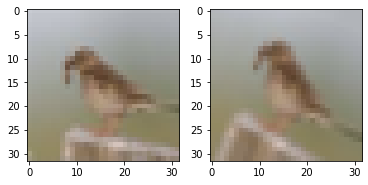

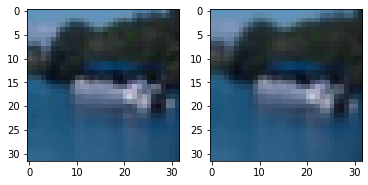

In [7]:
#gera2.py - Visualizar data augmentation - testado em Colab com TF2
#Programa para ver imagem original do CIFAR-10
#juntamente com a obtida pelo data augmentation
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from inspect import currentframe, getframeinfo
import os
from matplotlib import pyplot as plt
import sys
#main
nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()
ax = ax.reshape(ax.shape[0], nl, nc, 3)
qx = qx.reshape(qx.shape[0], nl, nc, 3)
input_shape = (nl, nc, 3)
ax = ax.astype('float32')
qx = qx.astype('float32')
ax /= 255 #0 a 1
qx /= 255 #0 a 1
num_classes=10
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)
print('Real-time data augmentation.')
datagen1 = ImageDataGenerator() #Nao distorce imagem
datagen2 = ImageDataGenerator( #Distorce imagem
  rotation_range = 45,
 )
# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
# Caso nao use, nao precisa destes comandos.
# datagen1.fit(ax)
# datagen2.fit(ax)
batch_size=3
#Importante usar a mesma semente, para pegar as mesmas imagens
augdata1=datagen1.flow(ax, batch_size=batch_size, seed=7)
augdata2=datagen2.flow(ax, batch_size=batch_size, seed=7)
a1=augdata1.next()
a2=augdata2.next()
for i in range(batch_size):
 fig, eixo = plt.subplots(1, 2)
 eixo[0].imshow(a1[i])
 eixo[1].imshow(a2[i])
 plt.show()
